In [ ]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import HeatMap
import seaborn as sns
import plotly.express as px

warnings.simplefilter(action="ignore", category=FutureWarning)

## **UPLOADING UNEMPLOYMENT CSV FILE**

Uploading the CSV file and converting it into a DataFrame

In [ ]:
url = 'https://raw.githubusercontent.com/Tshego04/Oasis-infobyte-projects/refs/heads/main/Unemployment%20in%20India.csv'

df1 = pd.read_csv(url)
df1.head(600)  # View the first few rows

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
595,Meghalaya,30-11-2019,Monthly,3.02,293431.0,57.02,Urban
596,Meghalaya,31-12-2019,Monthly,5.21,267417.0,53.04,Urban
597,Meghalaya,31-01-2020,Monthly,4.76,261687.0,51.53,Urban
598,Meghalaya,29-02-2020,Monthly,7.37,233965.0,47.26,Urban


# **GETTING TO KNOW MY DATA AND EXPLORING IT**

In [ ]:
df1.shape

(768, 7)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


# **DATA CLEANING**

**Removing unnecessary spaces in our column name**

In [ ]:
df1.columns = df1.columns.str.strip()

**Turning our date into the correct datetim format**

In [ ]:

df1['Date'] = df1['Date'].str.strip()
df1["Date"] = pd.to_datetime(df1["Date"], format="%d-%m-%Y")

**Checking for and removing duplicates in dataframe**

In [ ]:
df1.duplicated()
print("Duplicates in the entire DataFrame:", df1)

Duplicates in the entire DataFrame:              Region       Date Frequency  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh 2019-05-31   Monthly                             3.65   
1    Andhra Pradesh 2019-06-30   Monthly                             3.05   
2    Andhra Pradesh 2019-07-31   Monthly                             3.75   
3    Andhra Pradesh 2019-08-31   Monthly                             3.32   
4    Andhra Pradesh 2019-09-30   Monthly                             5.17   
..              ...        ...       ...                              ...   
763             NaN        NaT       NaN                              NaN   
764             NaN        NaT       NaN                              NaN   
765             NaN        NaT       NaN                              NaN   
766             NaN        NaT       NaN                              NaN   
767             NaN        NaT       NaN                              NaN   

     Estimated Employed  Estimated Labo

In [ ]:
df1.drop_duplicates()
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaT,NaN,NaN,NaN,NaN,NaN
764,NaN,NaT,NaN,NaN,NaN,NaN,NaN
765,NaN,NaT,NaN,NaN,NaN,NaN,NaN
766,NaN,NaT,NaN,NaN,NaN,NaN,NaN


**Checking for and removing Nan values in dataframe**

In [ ]:
df1.isna()
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaT,NaN,NaN,NaN,NaN,NaN
764,NaN,NaT,NaN,NaN,NaN,NaN,NaN
765,NaN,NaT,NaN,NaN,NaN,NaN,NaN
766,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.dropna(inplace=True)
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


# **SUMMARY STATISTICS**

The summary statistics represents the distribution of three variables: Estimated Unemployment Rate (%), Estimated Labour Participation Rate (%), and Estimated Employed in India.

In [ ]:
summary_stats = df1[["Estimated Unemployment Rate (%)", "Estimated Labour Participation Rate (%)", "Estimated Employed"]].describe()
summary_stats

,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),Estimated Employed
count,740.000000,740.000000,7.400000e+02
mean,11.787946,42.630122,7.204460e+06
std,10.721298,8.111094,8.087988e+06
min,0.000000,13.330000,4.942000e+04
25%,4.657500,38.062500,1.190404e+06
50%,8.350000,41.160000,4.744178e+06
75%,15.887500,45.505000,1.127549e+07
max,76.740000,72.570000,4.577751e+07


In [ ]:
skewness = df1["Estimated Unemployment Rate (%)"].skew()
print(f"Skewness: {skewness}")

Skewness: 2.2179211363550806


In [ ]:
skewness = df1["Estimated Labour Participation Rate (%)"].skew()
print(f"Skewness: {skewness}")

Skewness: 1.0314802351127672


In [ ]:
skewness = df1["Estimated Employed"].skew()
print(f"Skewness: {skewness}")

Skewness: 2.0498208182602657


Symmetry: If the median were close to Q1, the data would likely be more symmetric or have a normal distribution.
Skewness: When Q1 and the median are significantly different, it often implies that the distribution of the data is skewed. In this case, since the median is higher than Q1, the data could have a positive skew (more values concentrated on the lower end, with some larger values pulling the median higher).


Spread of Data: The width of the box (IQR) tells you about the spread of the data. A large IQR means the data is more spread out. IQR (Q3 - Q1): 20
An IQR of 11 suggests that your dataset has a relatively wide spread for the middle 50% of the values, which may indicate moderate variability or diversity in your data.

# **EXPLORATORY DATA VISUALISATION**

This section is the analysis of unemployment in India.

**Visualising summary statistics using boxplot**

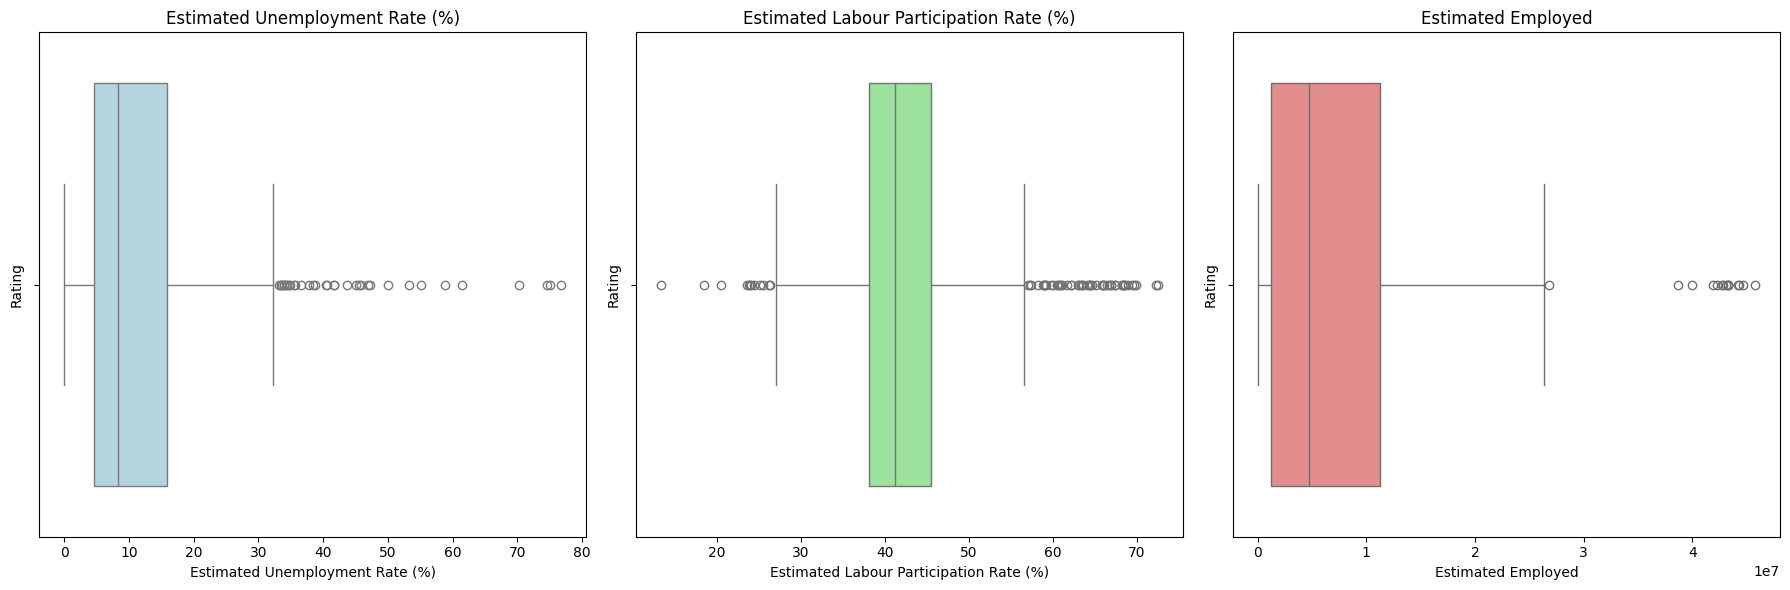

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], data=df1['Estimated Unemployment Rate (%)'], color='lightblue',orient='h')
axes[0].set_title('Estimated Unemployment Rate (%)')
axes[0].set_ylabel('Rating')
axes[0].set_xlabel('Estimated Unemployment Rate (%)')

sns.boxplot(ax=axes[1], data=df1['Estimated Labour Participation Rate (%)'], color='lightgreen',orient='h')
axes[1].set_title('Estimated Labour Participation Rate (%)')
axes[1].set_ylabel('Rating')
axes[1].set_xlabel('Estimated Labour Participation Rate (%)')

sns.boxplot(ax=axes[2], data=df1['Estimated Employed'], color='lightcoral',orient='h')
axes[2].set_title('Estimated Employed')
axes[2].set_ylabel('Rating')
axes[2].set_xlabel('Estimated Employed')

plt.tight_layout()

plt.show()

Estimated Unemployment Rate - the dataset is positevly/right skewed, meaning that most of the time, the unemployment rate is low or moderate, but there are some extreme cases where the unemployment rate spikes very high, skewing the overall distribution.
An IQR(Q3 - Q1) of 11% suggests that the dataset has a relatively wide spread for the middle 50% of the values, which may indicate moderate variability or diversity in your data.
The boxplot also indicated outliers in the dataset which are the points outside the boxplot.

Estimated Labour participation - the boxplot is right or positively skewed, this suggests that while most of the data points for the labor force participation rate are clustered towards the lower end, there are a few higher values that stretch the distribution towards the right. This often occurs when there are some cases (regions or time periods) where the participation rate is higher than the majority of the data, pulling the mean toward the higher values.
A 7.4425% IQR(Q3 -Q1) suggests that the data has a moderate spread around the median, indicating some variability in labor force participation, but not extreme.
The boxplot also indicated outliers in the dataset.

Estimated Employment -
An IQR(Q3 - Q2) of 14.698 million indicates a wide spread between the middle 50% of the data points.

**Histogram visualisation**

It is to check for the distribution of the Estimated Unemployment Rate(%) dataset.

x-axis- Estimated Unemployment Rate (%)

y-axis- Frequency

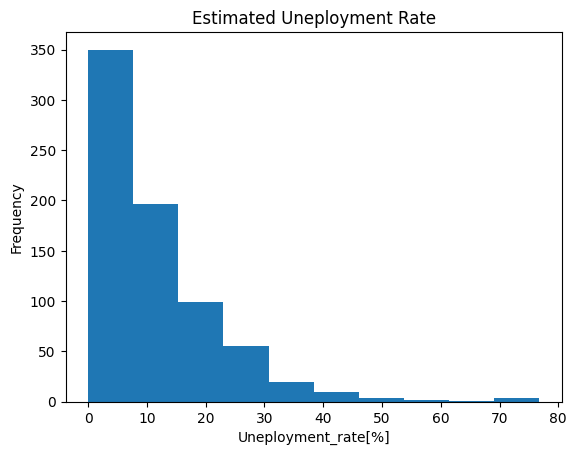

In [ ]:
plt.hist(df1["Estimated Unemployment Rate (%)"])
plt.xlabel("Uneployment_rate[%]")
plt.ylabel("Frequency")
plt.title("Estimated Uneployment Rate")
plt.show()

The histogram is right skewed or positively skewed and indicating outliers at the end of the graph.

**Line Graph**

The line graph shows Estimated Unemployment Rate[%] overtime. The graph shows the time before and after lockdown, which indicates that before lockdown (2019)  the unemployment rate was lower compared to after/during lockdown (2020)

x-axis- Date

y-axis- Estimated unemployment rate(%)

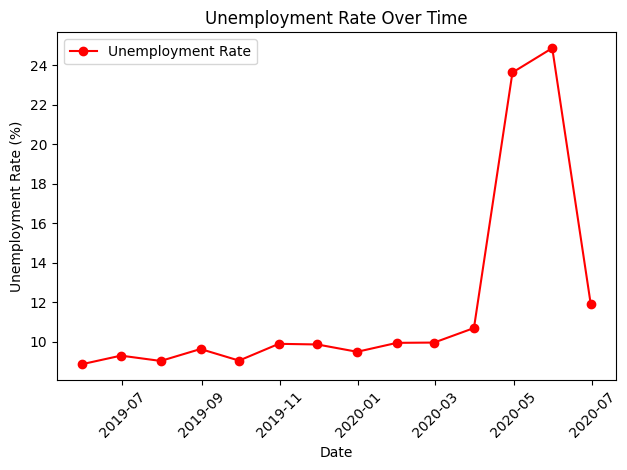

In [ ]:
grouped_data = df1.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

plt.plot(grouped_data.index, grouped_data.values, marker='o', color='r', label='Unemployment Rate')

plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')

plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()
plt.show()

The graph shows the time before and after lockdown, which indicates that before lockdown (2019)  the unemployment rate was lower compared to after/during lockdown (2020).

Pre-Lockdown (2019): Before COVID-19, the global economy was generally stable, with India experiencing low unemployment rates due to steady economic growth, active labor markets, and relatively low levels of economic disruption.

Post-Lockdown (2020): When lockdown measures were implemented in 2020 to limit the spread of COVID-19, businesses across various sectors (such as retail, hospitality, travel, manufacturing, and entertainment) had to shut down or drastically reduce their operations. This led to widespread job losses, layoffs, and furloughs due to the fact that businesses made loses and they couldn't afford to pay it's workers, pushing the unemployment rate significantly higher to 24%.


**Bar graph**

The bar graph is to compare the Estimated Unemployment Rate[%] in rural and urban areas and also to uncover which area has more impact in Estimated Unemployment Rate[%].

x-axis- Area which include urban and rural areas

-axis- Estimated unemployment rate(%)

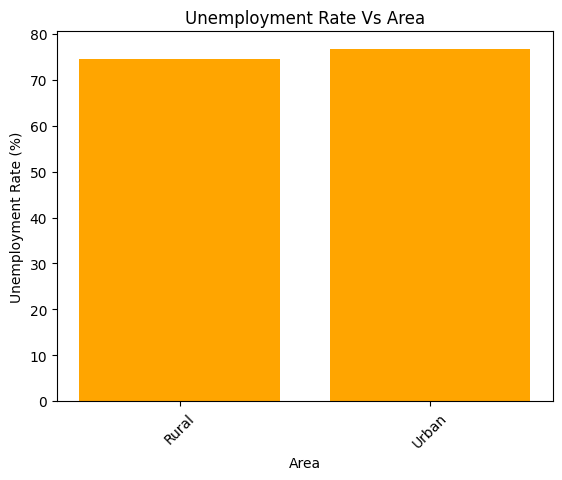

In [ ]:
plt.bar(df1['Area'], df1['Estimated Unemployment Rate (%)'], color='orange')
plt.xlabel('Area')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Vs Area')
plt.xticks(rotation=45)
plt.show()

The urban area(approximately 78%) has a slightly higher unemployment rate compared to rural areas(approximately 75%), suggesting that there are different factors unique to each area that influence unemployment rates.

While urban areas historically tend to have higher unemployment rates due to factors such as population density, higher competition, and specialized labor markets, COVID-19 intensified these challenges. The pandemic led to widespread business closures, job losses in key sectors, and a larger influx of job seekers, all of which contributed to a more significant rise in unemployment in urban centers. On the other hand, rural areas, while also impacted by the pandemic, saw relatively lower increases in unemployment because of the more stable employment provided by essential industries like agriculture and local services. The pandemic's impact on job loss, shifting work patterns, and economic disruption affected both areas, but urban areas experienced a sharper rise in unemployment due to their higher exposure to industries hit hardest by the crisis.

**Heatmap**

The heatmap shows correlation between factors that can impact unemployment rate in India. There is no correlation between Estimated Unemployment Rate and Estimated Labour Participation Rate (%).

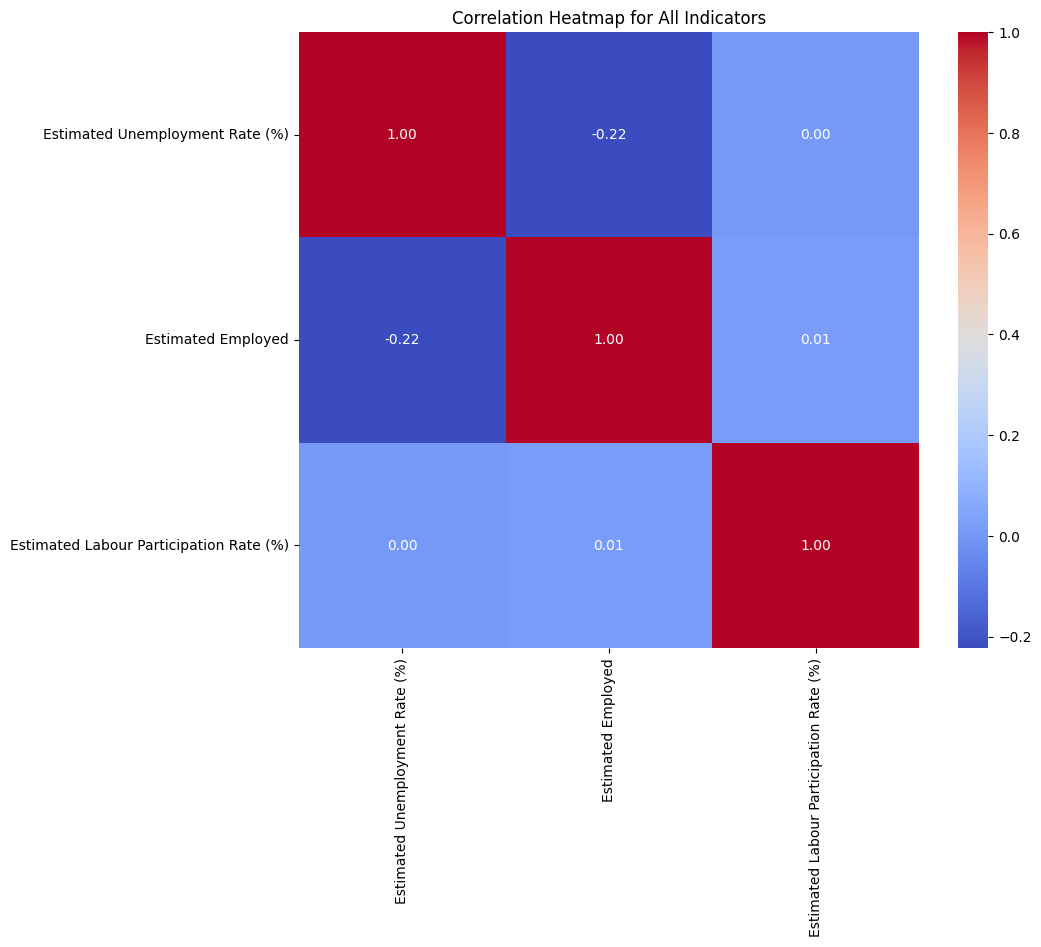

In [ ]:
df1_columns = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']

correlation_matrix = df1[df1_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap for All Indicators')
plt.show()

There is no correlation/relationship between Estimated Unemployment Rate and Estimated Labour Participation Rate (%), meaning that changes in Estimated Labour Participation Rate (%) doesn't directly relate to changes in Estimated Unemployment Rate.The reason is that they measure different aspects of the economy and labor market.

There is a negative correlation/relationship between Estimated Unemployment Rate and Estimated Employed, meaning that when Estimated Employed decreases the Estimated Unemployment Rate(%) decreasesincreses as more people are unemployed. This can happen due to factors such as recessions and industry-specific declines which in case of COVID19  a lot of people got layed-off and unemployment rate increased.

**Bar graph**

The graph is to show unemployment rate across regions in India.

x-axis- Regions

y-axis- Estimated unemployment rate

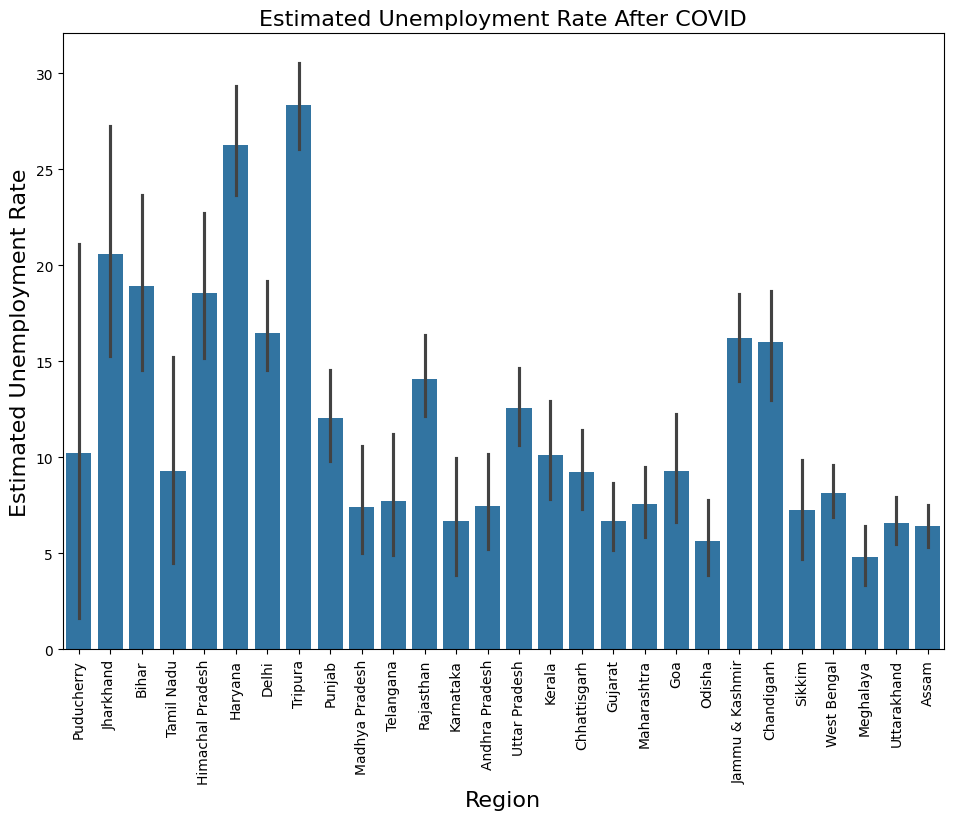

In [ ]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title("Estimated Unemployment Rate Across Regions", fontsize=16)
sns.barplot(data=df1.sort_values(by='Estimated Unemployment Rate (%)', ascending=False), x="Region", y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)
plt.show()

Tripura has the highest unemployment rate compared to other regions.

# **Filtering data according to their before and after lokcdown dates**

This section is the analysis of unemployment rate in India before and after COVID-19.
The lockdown started on the 25th of March 2019 in India.

In [ ]:
df1["Date"].unique()

<DatetimeArray>
['2019-05-31 00:00:00', '2019-06-30 00:00:00', '2019-07-31 00:00:00',
 '2019-08-31 00:00:00', '2019-09-30 00:00:00', '2019-10-31 00:00:00',
 '2019-11-30 00:00:00', '2019-12-31 00:00:00', '2020-01-31 00:00:00',
 '2020-02-29 00:00:00', '2020-03-31 00:00:00', '2020-04-30 00:00:00',
 '2020-05-31 00:00:00', '2020-06-30 00:00:00']
Length: 14, dtype: datetime64[ns]

In [ ]:
# Defining the lockdown date
lockdown_date = pd.to_datetime('2020-03-25')

df1['lockdown_status'] = df1['Date'].apply(lambda x: 'Before Lockdown' if x < lockdown_date else 'After Lockdown')
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,lockdown_status
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,Before Lockdown
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,Before Lockdown
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,Before Lockdown
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,Before Lockdown
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,Before Lockdown


**Bar graph**

It shows unemployment rate before and after lockdown(lockdown status).

x-axis- lockdown_status

y-axis- Estimated unemployment rate

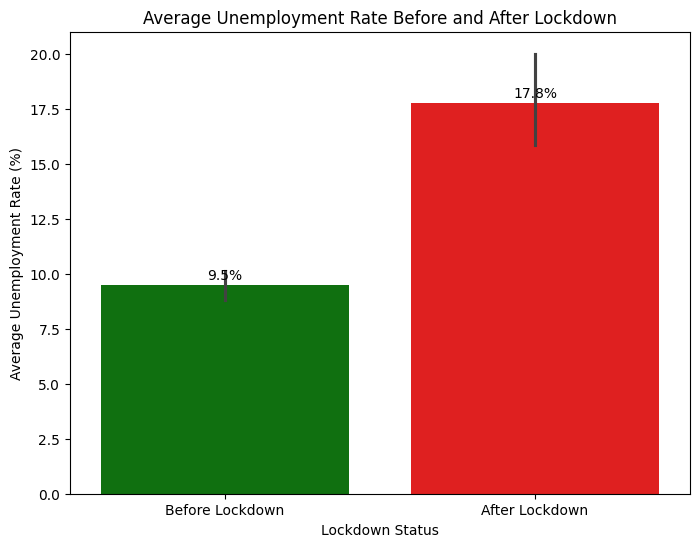

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='lockdown_status', y='Estimated Unemployment Rate (%)', data=df1, estimator='mean',
                 hue='lockdown_status', palette={'Before Lockdown': 'green', 'After Lockdown': 'red'})

def add_percentage_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height:.1f}%',
                ha='center', va='bottom', color='black', fontsize=10)

add_percentage_labels(ax)
plt.title('Average Unemployment Rate Before and After Lockdown')
plt.xlabel('Lockdown Status')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()

Unemployment rate was higher after lockdown than it was before lockdown.As it was 9.5% before lockdown and increased to 17.8% after lockdown, an increase of 8.3%.

The unemployment rate was higher after the lockdown compared to before, likely due to business closures, layoffs, and widespread retrenchment resulting from the economic impact of the pandemic. COVID-19 and the associated lockdown measures severely disrupted various sectors, leading to job losses across industries, particularly in those most reliant on in-person activities like hospitality, retail, and transportation. This disruption, combined with the economic slowdown and uncertainty, led to a significant rise in unemployment in India.

**Bar Graph**

The bar graph below shows Estimated Unemployment Rate across different areas using lockdown status. The aim is to see which areas where affected the most by unemployment rate due to COVID19.

x-axis- Area

y-axis- Estimated unemployment rate(%)

Legends- Lockdown_status

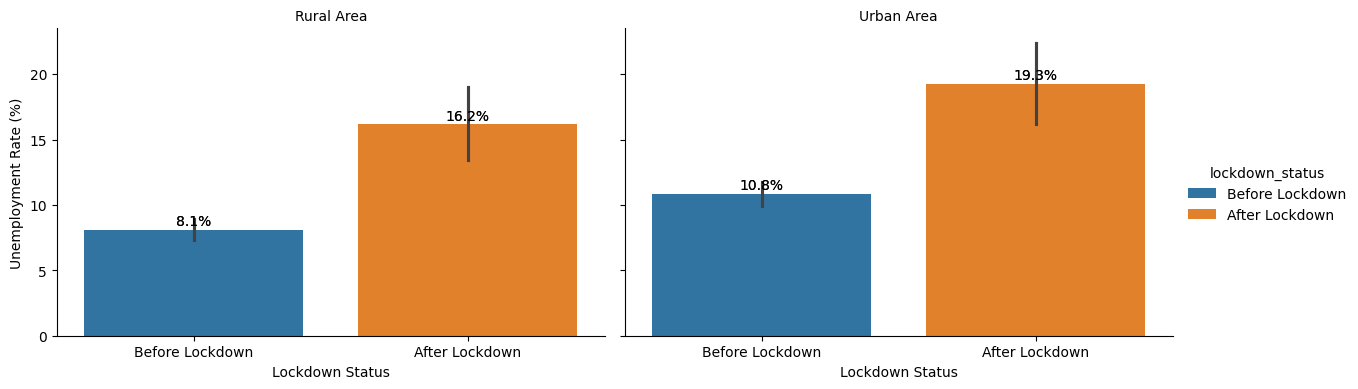

In [ ]:
g = sns.FacetGrid(df1, col="Area", hue="lockdown_status", height=4, aspect=1.5)
g.map(sns.barplot, "lockdown_status", "Estimated Unemployment Rate (%)", order=["Before Lockdown", "After Lockdown"])

def add_percentage_labels(*args, **kwargs):
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height:.1f}%',
                ha='center', va='bottom', color='black', fontsize=10)

g.map(add_percentage_labels)
g.add_legend()
g.set_titles("{col_name} Area")
g.set_axis_labels("Lockdown Status", "Unemployment Rate (%)")
plt.show()

Rural area felt a little pain/pressure concerning unemployment compared to urban area. The unemployment is higher in urban area after lockdown compared to before lockdown and rural area.

Both regions experienced a higher unemployment rate during and after the lockdown compared to the unemployment rate observed before the COVID-19 pandemic.

Rural area- The unemployment rate for rural areas was  8.1% before lockdown it then increased to 16.2%  after lockdown, an increase of 8.1% indicating the impact of COVID-19 on unemployment.

Urban area- The unemployment rate for urban areas was  10.8% before lockdown it then increased to 19.3%  after lockdown, an increase of 8.5% indicating the impact of COVID-19 on unemployment.


**Stacked bar graph**


The stacked bar graph is to compare the unemployment rate post and after lockdown among regions.

x-axis- Regions

y-axis- Estimated Unemployment Rate(%)

Legends- lockdown_status

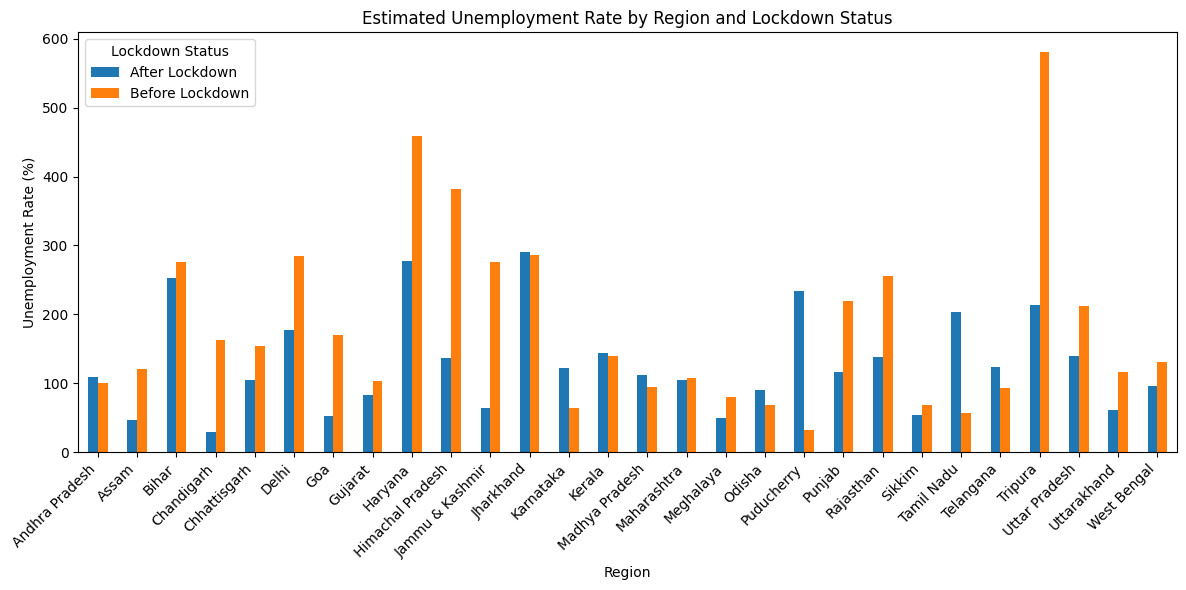

In [ ]:
df_pivot = df1.pivot_table(values='Estimated Unemployment Rate (%)', index='Region', columns='lockdown_status', aggfunc='sum', fill_value=0)
ax = df_pivot.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Estimated Unemployment Rate by Region and Lockdown Status')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Lockdown Status')
plt.tight_layout()
plt.show()

Each region experienced an increase in unemployment rate due to COVID-19 which resulted in lockdown at India to limit the spread of the virus. Other regions experienced a higher unemployment than the other regions.

**Animated bar chart**
The animated bar chart illustrates the unemployment rate across different regions, categorized by areas, with respect to their lockdown status.

x-axis- Area

y-axis- Estimated Unemployment Rate (%)

Legend- lockdown_status

In [ ]:
fig = px.bar(df1, x='Area', y='Estimated Unemployment Rate (%)', animation_frame='Region', color='lockdown_status',
             title='Unemployment rate across regions before and after lockdown', height=700, template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Adjusting the animation frame duration
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.show()


# **CONCLUSION**

The COVID-19 had a huge impact on unemployment rate in India. This is indicated by the above visualisations.